# Obtaining basic statistics for textual lengths

In [25]:
import pandas as pd
import numpy as np
import talib
import yfinance as yf
import spacy
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import importlib
importlib.reload(nltk)


<module 'nltk' from '/home/yadasa/.local/lib/python3.10/site-packages/nltk/__init__.py'>

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Project Planning - EDA & Stats

In [5]:
df = pd.read_csv("../data/raw_analyst_ratings.csv",)

In [5]:
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


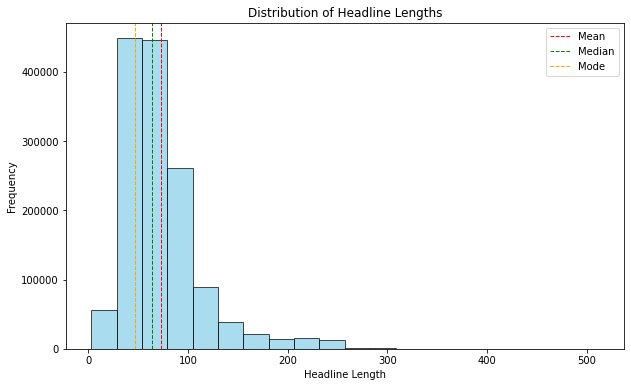

In [6]:
# Calculate the length of each headline and create a new column
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()

# Print the statistics
print(headline_stats)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')

# Add vertical lines for mean, median, and mode
plt.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['headline_length'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

mode_val = df['headline_length'].mode()[0]  # Mode could be multiple values, so taking the first one
plt.axvline(mode_val, color='orange', linestyle='dashed', linewidth=1, label='Mode')

plt.legend()

# Show plot
plt.show()


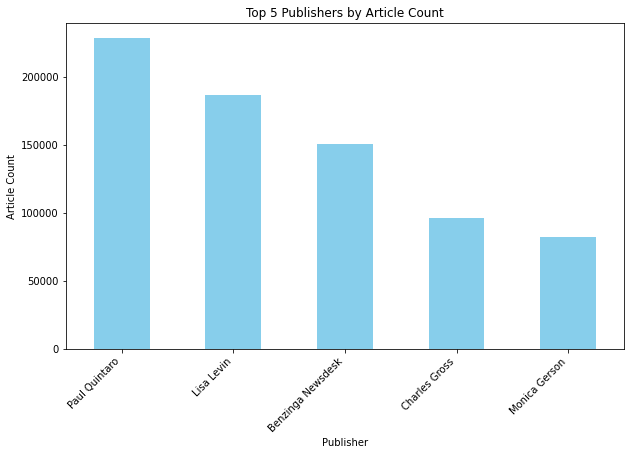

Publisher: Paul Quintaro
Article Count: 228373
------------------------------------
Publisher: Lisa Levin
Article Count: 186979
------------------------------------
Publisher: Benzinga Newsdesk
Article Count: 150484
------------------------------------
Publisher: Charles Gross
Article Count: 96732
------------------------------------
Publisher: Monica Gerson
Article Count: 82380
------------------------------------
Most frequent publisher for advertising: Paul Quintaro


In [7]:

# with a column named 'publisher' containing the publisher names.

# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Identify the top N most frequent publishers
top_publishers = publisher_counts.head(5)  # Change 5 to any desired number of top publishers

# Plotting the article counts for the top N most frequent publishers
plt.figure(figsize=(10,6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Iterate over the top publishers and print their article counts
for publisher, count in top_publishers.items():
    print("Publisher:", publisher)
    print("Article Count:", count)
    print("------------------------------------")

# Choose a publisher for advertising based on their publishing frequency
most_frequent_publisher = top_publishers.idxmax()
print("Most frequent publisher for advertising:", most_frequent_publisher)


In [9]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')

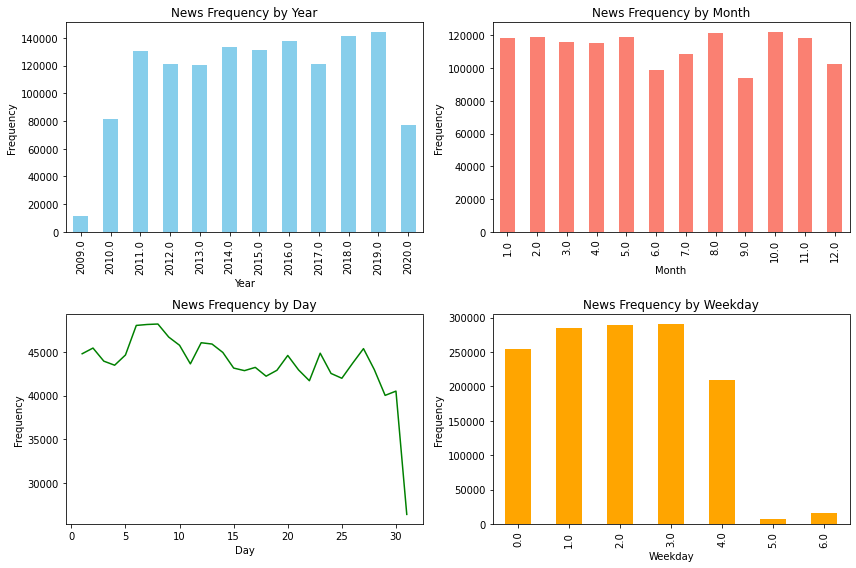

In [10]:
# Check if the 'date' column exists in the DataFrame
if 'date' in df.columns:
    # Convert the 'date' column to datetime format with the correct format
    df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

    # Extract relevant date components for analysis
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday  

    # Analyze trends over time, such as news frequency by year, month, day, and weekday
    news_frequency_by_year = df['year'].value_counts().sort_index()
    news_frequency_by_month = df.groupby('month').size()
    news_frequency_by_day = df.groupby('day').size()
    news_frequency_by_weekday = df.groupby('weekday').size()

    # Plotting news frequency trends over time
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    news_frequency_by_year.plot(kind='bar', color='skyblue')
    plt.title('News Frequency by Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    news_frequency_by_month.plot(kind='bar', color='salmon')
    plt.title('News Frequency by Month')
    plt.xlabel('Month')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    news_frequency_by_day.plot(kind='line', color='green')
    plt.title('News Frequency by Day')
    plt.xlabel('Day')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    news_frequency_by_weekday.plot(kind='bar', color='orange')
    plt.title('News Frequency by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'date' column not found in the DataFrame.")


In [11]:
df.describe()

,Unnamed: 0,date,headline_length,year,month,day,weekday
count,1.407328e+06,1351341,1.407328e+06,1.351341e+06,1.351341e+06,1.351341e+06,1.351341e+06
mean,7.072454e+05,2015-07-06 06:39:44.879020288,7.312051e+01,2.015021e+03,6.413978e+00,1.555752e+01,1.998925e+00
min,0.000000e+00,2009-02-14 00:00:00,3.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.538128e+05,2012-12-04 00:00:00,4.700000e+01,2.012000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,7.072395e+05,2015-07-21 00:00:00,6.400000e+01,2.015000e+03,6.000000e+00,1.500000e+01,2.000000e+00
75%,1.060710e+06,2018-03-09 00:00:00,8.700000e+01,2.018000e+03,1.000000e+01,2.300000e+01,3.000000e+00
max,1.413848e+06,2020-06-03 00:00:00,5.120000e+02,2.020000e+03,1.200000e+01,3.100000e+01,6.000000e+00
std,4.081009e+05,NaN,4.073531e+01,3.024726e+00,3.469710e+00,8.809733e+00,1.427424e+00


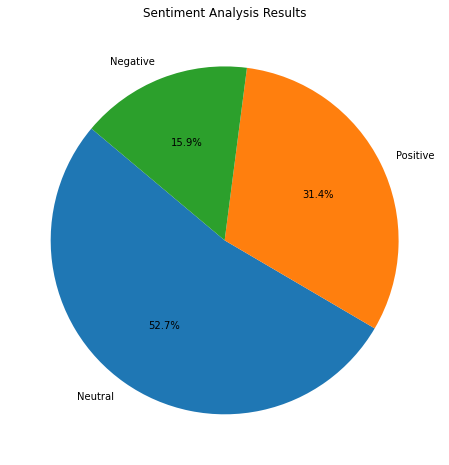

Most frequent publisher for advertising based on sentiment analysis: Paul Quintaro


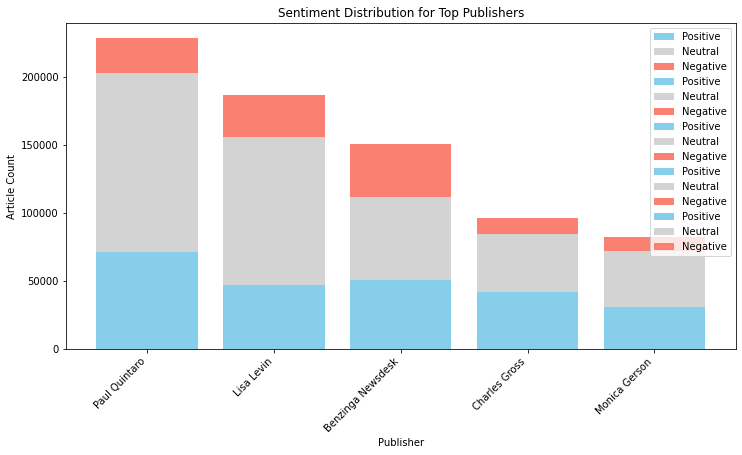

The overall sentiment is positive. Continue advertising efforts with the current strategy.


In [9]:

# with columns named 'headline', 'publisher', and 'sentiment_class'
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each headline
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)  # Get sentiment scores
    return sentiment

# Apply the function to each headline and store the results in a new column
df['sentiment'] = df['headline'].apply(get_sentiment_score)

# Define a function to classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the compound score and store the results in a new column
df['sentiment_class'] = df['sentiment'].apply(lambda x: classify_sentiment(x['compound']))

# Count the number of headlines per sentiment class
sentiment_counts = df['sentiment_class'].value_counts()

# Plotting sentiment distribution with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.show()

# Re-generating the most frequent publisher for advertising based on sentiment analysis results
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Identify the top N most frequent publishers
top_publishers = publisher_counts.head(5)  # Change 5 to any desired number of top publishers

# Choose a publisher for advertising based on their publishing frequency
most_frequent_publisher = top_publishers.idxmax()
print("Most frequent publisher for advertising based on sentiment analysis:", most_frequent_publisher)

# Plotting sentiment distribution for each top publisher
plt.figure(figsize=(12, 6))
for publisher in top_publishers.index:
    publisher_sentiments = df[df['publisher'] == publisher]['sentiment_class'].value_counts()
    publisher_sentiments = publisher_sentiments.reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    plt.bar(publisher, publisher_sentiments['Positive'], color='skyblue', label='Positive')
    plt.bar(publisher, publisher_sentiments['Neutral'], bottom=publisher_sentiments['Positive'], color='lightgrey', label='Neutral')
    plt.bar(publisher, publisher_sentiments['Negative'], bottom=publisher_sentiments['Positive']+publisher_sentiments['Neutral'], color='salmon', label='Negative')

plt.title('Sentiment Distribution for Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Suggestions based on sentiment analysis
if sentiment_counts['Positive'] > sentiment_counts['Negative']:
    print("The overall sentiment is positive. Continue advertising efforts with the current strategy.")
elif sentiment_counts['Positive'] < sentiment_counts['Negative']:
    print("The overall sentiment is negative. Consider revising advertising strategies or addressing the issues causing negative sentiment.")
else:
    print("The sentiment is balanced. Evaluate the effectiveness of advertising efforts and consider optimizing strategies based on other metrics.")


In [10]:
# Load the English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1500000  # Increase max_length to handle longer texts

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Set chunk size
chunk_size = 100000  # Adjust as needed

# Function to process text in chunks
def process_text_chunks(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Filter out stop words and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

    # Perform part-of-speech tagging to extract nouns and proper nouns
    pos_tags = pos_tag(filtered_tokens)
    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]

    # Use spaCy for named entity recognition (NER)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Filter entities to extract only significant ones
    significant_entities = [entity[0] for entity in entities if entity[1] in ['ORG', 'PERSON', 'GPE', 'EVENT']]

    # Combine both noun phrases and significant named entities
    keywords = nouns + significant_entities

    return keywords

# Concatenate all headlines into a single string
all_headlines = ' '.join(df['headline'])

# Process the text in chunks
chunks = [all_headlines[i:i+chunk_size] for i in range(0, len(all_headlines), chunk_size)]

# Initialize a list to store keywords from all chunks
all_keywords = []

# Process each chunk separately
for chunk in chunks:
    keywords = process_text_chunks(chunk)
    all_keywords.extend(keywords)

# Calculate the frequency distribution of keywords
fdist = FreqDist(all_keywords)

# Get the most common keywords
common_keywords = fdist.most_common(10)

# Print the most common keywords
print("Most common keywords or phrases:")
for keyword, frequency in common_keywords:
    print(f"{keyword}: {frequency}")


Most common keywords or phrases:
Stocks: 157529
EPS: 136718
Est: 120858
Reports: 106667
vs: 104958
Benzinga: 92032
Shares: 91631
Earnings: 84910
Market: 83721
Top: 75682


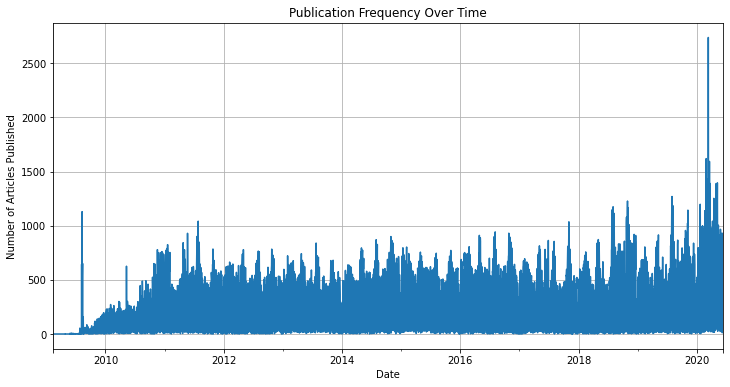

In [11]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data to get the count of articles per day
article_count_per_day = df.resample('D').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
article_count_per_day.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()


 # Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems

In [13]:
# df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [14]:
df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,weekday
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,NaN,NaN,NaN,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,NaN,NaN,NaN,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,NaN,NaN,NaN,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,NaN,NaN,NaN,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,NaN,NaN,NaN,NaN
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,NaT,A,71,NaN,NaN,NaN,NaN
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,NaT,A,73,NaN,NaN,NaN,NaN
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,NaT,A,120,NaN,NaN,NaN,NaN
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,NaT,A,84,NaN,NaN,NaN,NaN
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,NaT,A,42,NaN,NaN,NaN,NaN


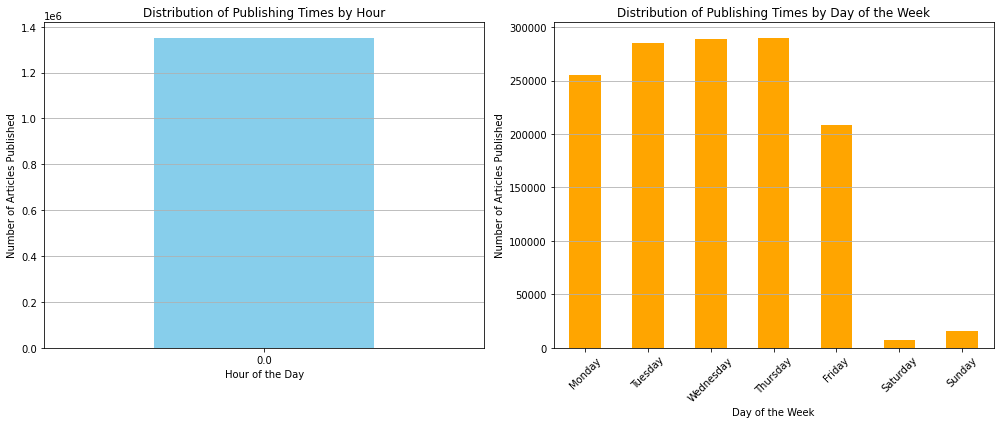

Statistical Analysis:
Hourly Mean: 1351341.00, Hourly Standard Deviation: nan
Daily Mean: 193048.71, Daily Standard Deviation: 127114.49

Recommendations:
The best hour for publishing articles is around 0.0:00.
The best day for publishing articles is Thursday.


In [15]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Extract the day of the week and hour of the day from the 'date' column
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Count the number of articles published during each hour and day of the week
article_count_by_hour = df.groupby('hour').size()
article_count_by_day = df.groupby('day_of_week').size()

# Plot the distribution of publishing times by hour
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
article_count_by_hour.plot(kind='bar', color='skyblue')
plt.title('Distribution of Publishing Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Plot the distribution of publishing times by day of the week
plt.subplot(1, 2, 2)
article_count_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='orange')
plt.title('Distribution of Publishing Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Statistical analysis
hourly_mean = article_count_by_hour.mean()
hourly_std = article_count_by_hour.std()

daily_mean = article_count_by_day.mean()
daily_std = article_count_by_day.std()

# Recommendations
optimal_hour = article_count_by_hour.idxmax()
optimal_day = article_count_by_day.idxmax()

print("Statistical Analysis:")
print(f"Hourly Mean: {hourly_mean:.2f}, Hourly Standard Deviation: {hourly_std:.2f}")
print(f"Daily Mean: {daily_mean:.2f}, Daily Standard Deviation: {daily_std:.2f}")

print("\nRecommendations:")
print(f"The best hour for publishing articles is around {optimal_hour}:00.")
print(f"The best day for publishing articles is {optimal_day}.")



# Which publishers contribute most to the news feed? Is there a difference in the type of news they report?

# To answer the above two question, we use 
# 1)findind number of article published by each publisher
# 2)Number of stop words in each publishing

In [26]:
# Count the number of articles published by each publisher
publisher_counts = df['publisher'].value_counts()

# Sort publishers by the number of articles published (in ascending order)
sorted_publishers = publisher_counts.sort_values().index

# Filter out stop words
stop_words = set(stopwords.words('english'))

# Tokenize and process the headlines to identify common keywords
keywords_by_publisher = {}
for publisher in sorted_publishers:
    publisher_data = df[df['publisher'] == publisher]
    all_headlines = ' '.join(publisher_data['headline'])
    tokens = word_tokenize(all_headlines)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    fdist = FreqDist(filtered_tokens)
    keywords_by_publisher[publisher] = fdist.most_common(10)  # Get top 10 keywords for each publisher

# Print the number of articles published by each publisher
print("Number of articles published by each publisher (in ascending order):")
print(publisher_counts)
print("\n")

# Print the top keywords associated with each publisher
print("Top keywords associated with each publisher:")
for publisher in sorted_publishers:
    print(f"Publisher: {publisher}")
    keywords = keywords_by_publisher.get(publisher, [])
    for keyword, frequency in keywords:
        print(f"{keyword}: {frequency}")
    print("\n")


Number of articles published by each publisher (in ascending order):
publisher
Paul Quintaro                 228373
Lisa Levin                    186979
Benzinga Newsdesk             150484
Charles Gross                  96732
Monica Gerson                  82380
                               ...  
David Wenger                       1
Holly Huber - CrowdStreet          1
Ryan Smith                         1
vic@forextraininggroup.com         1
official@stockmetrix.net           1
Name: count, Length: 1034, dtype: int64


Top keywords associated with each publisher:
Publisher: Joe Donato
investors: 1
bid: 1
adieu: 1
baidu: 1
jpmorgan: 1
initiates: 1
underweight: 1


Publisher: Holly Huber - CrowdStreet
lights: 1
camera: 1
production: 1
hollywood: 1
real: 1
estate: 1
developing: 1
means: 1
investors: 1


Publisher: David Wenger
white: 1
paper: 1
case: 1
investing: 1
us: 1
cannabis: 1
industry: 1


Publisher: Monetarex
healthcare: 1
shocker: 1


Publisher: Suresh Gupta
restaurant: 1
sect

# What if the publisher is an Orginization which contributes most to news?
# if eamil is used as publisher name we can extract unique domains

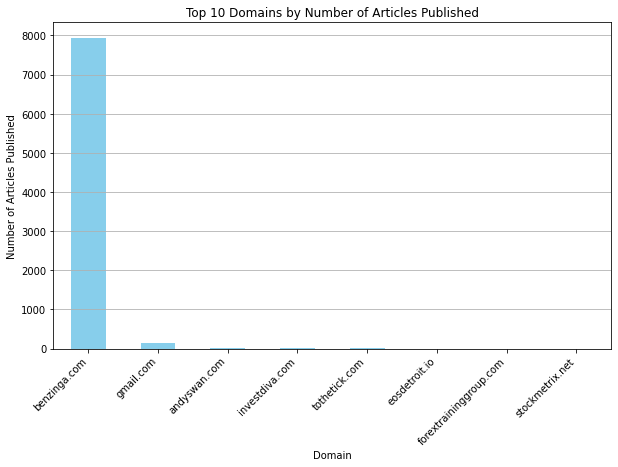

Unique domains and their publication counts:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

The most contributing domain is 'benzinga.com' with 7937 articles published.


In [27]:
# Extract domain from email addresses
df['domain'] = df['publisher'].str.extract(r'@(.*)')

# Count the number of articles published by each domain
domain_counts = df['domain'].value_counts()

# Plot the distribution of articles published by domain
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Domains by Number of Articles Published')
plt.xlabel('Domain')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Print the unique domains and their corresponding publication counts
print("Unique domains and their publication counts:")
print(domain_counts)

# Find the domain with the highest number of articles published
most_contributor_domain = domain_counts.idxmax()
articles_published = domain_counts.max()

# Print the most contributing domain
print(f"\nThe most contributing domain is '{most_contributor_domain}' with {articles_published} articles published.")


#  Task-2

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# df =df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [30]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,weekday,day_of_week,hour,domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Stock price fetching using yfinance

[*********************100%%**********************]  1 of 1 completed


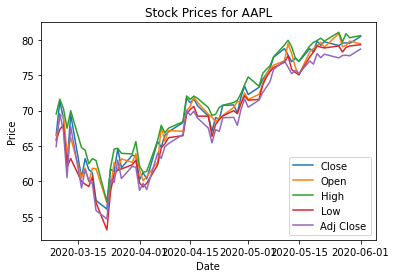

[*********************100%%**********************]  1 of 1 completed


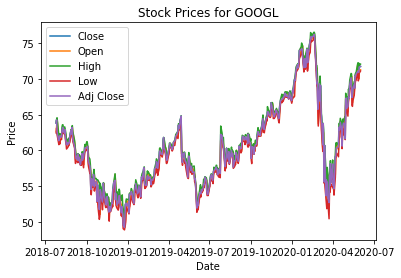

[*********************100%%**********************]  1 of 1 completed


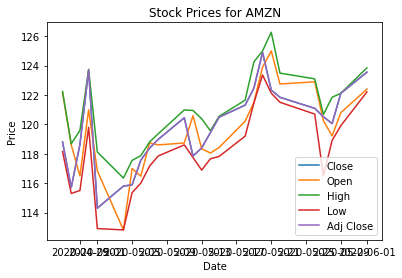

In [32]:
from datetime import timedelta
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

# Define the list of company symbols
companies = ['AAPL', 'GOOGL','AMZN',]

# Define Rolling Window Parameters
window_size = timedelta(days=30)  # One month window

# Fetch Stock Prices within Rolling Windows and Plot for each company
for company in companies:
    # Filter data for the current company
    company_data = df[df['stock'] == company]
    
    try:
        # Fetch stock data for the current company based on the entire date range
        stock_data = yf.download(company, start=company_data['date'].min(), end=company_data['date'].max())
        
        if not stock_data.empty:  # Check if data is not empty
            # Plot stock prices
            plt.plot(stock_data.index, stock_data['Close'], label='Close')
            plt.plot(stock_data.index, stock_data['Open'], label='Open')
            plt.plot(stock_data.index, stock_data['High'], label='High')
            plt.plot(stock_data.index, stock_data['Low'], label='Low')
            plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close')
            
            plt.title(f'Stock Prices for {company}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.show()
            
        else:
            print(f"No data available for {company}")
        
    except Exception as e:
        print(f"Error fetching data for {company}: {e}")

[*********************100%%**********************]  1 of 1 completed

Insights from Stock Data Analysis:


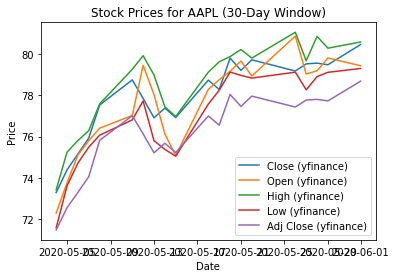

[*********************100%%**********************]  1 of 1 completed


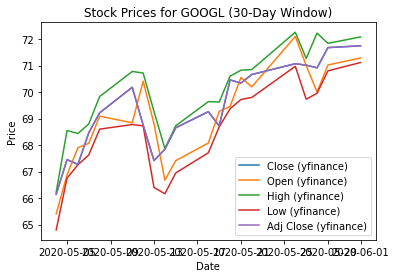

[*********************100%%**********************]  1 of 1 completed


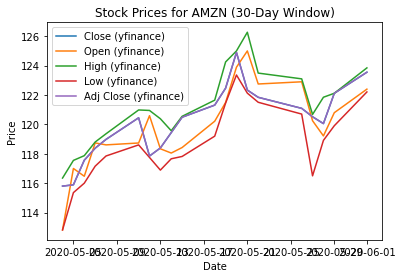

In [34]:
from datetime import timedelta

df['date'] = pd.to_datetime(df['date'], format='ISO8601')

# Define the list of company symbols
companies = ['AAPL', 'GOOGL', 'AMZN']

# Define Rolling Window Parameters
window_size = timedelta(days=30)  # One month window

# Report Insights
print("Insights from Stock Data Analysis:")

# Define a function to compare data from the dataset and yfinance
def compare_data(company, start_date, end_date):
    try:
        # Fetch stock data for the current company within the 30-day window from yfinance
        stock_data = yf.download(company, start=start_date, end=end_date)

        if not stock_data.empty:  # Check if data is not empty
            # Plot stock prices from yfinance
            plt.plot(stock_data.index, stock_data['Close'], label='Close (yfinance)')
            plt.plot(stock_data.index, stock_data['Open'], label='Open (yfinance)')
            plt.plot(stock_data.index, stock_data['High'], label='High (yfinance)')
            plt.plot(stock_data.index, stock_data['Low'], label='Low (yfinance)')
            plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close (yfinance)')

            plt.title(f'Stock Prices for {company} (30-Day Window)')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.show()

        else:
            print(f"No data available for {company} from yfinance within the 30-day window")

    except Exception as e:
        print(f"Error fetching data for {company} from yfinance: {e}")

# Fetch Stock Prices within Rolling Windows and Plot for each company
for company in companies:
    # Filter data for the current company
    company_data = df[df['stock'] == company]

    # Calculate start and end dates for the 30-day window
    end_date = company_data['date'].max()
    start_date = end_date - window_size

    # Compare data from dataset and yfinance
    compare_data(company, start_date, end_date)


In [35]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'year', 'month', 'day', 'weekday', 'day_of_week',
       'hour', 'domain'],
      dtype='object')


# Task 3

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


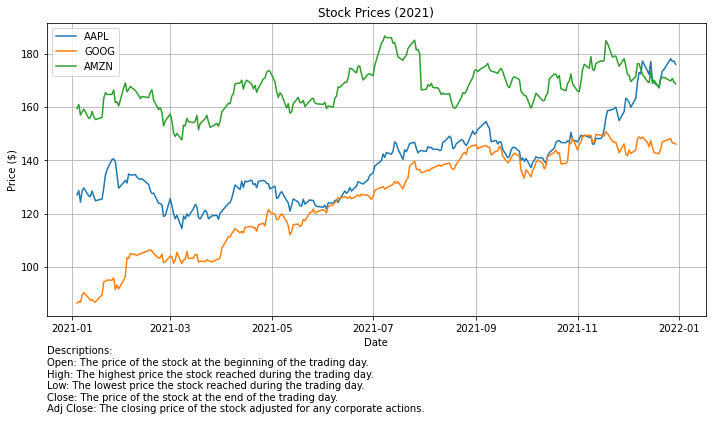

Analysis based on the graph:
------------------------------
Trend Similarities/Differences:
AAPL: Upward trend
GOOG: Upward trend
AMZN: Upward trend

Volatility:
AAPL: 14.50
GOOG: 18.36
AMZN: 8.02

Relative Performance:
AAPL: 38.55%
GOOG: 68.96%
AMZN: 5.85%


In [8]:
# Loading stock price data
symbols = ['AAPL', 'GOOG', 'AMZN']  # Example stock symbols (Apple, Google, Amazon)
start_date = '2021-01-01'
end_date = '2021-12-31'

# Download data for each symbol and concatenate into a single DataFrame
dfs = []
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol  # Add a column to identify the stock symbol
    dfs.append(data)

all_data = pd.concat(dfs)

# Plot stock prices
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['Adj Close'], label=symbol)

plt.title('Stock Prices (2021)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Add descriptions below the graph
plt.text(plt.xlim()[0], plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1, "Descriptions:\nOpen: The price of the stock at the beginning of the trading day.\nHigh: The highest price the stock reached during the trading day.\nLow: The lowest price the stock reached during the trading day.\nClose: The price of the stock at the end of the trading day.\nAdj Close: The closing price of the stock adjusted for any corporate actions.", fontsize=10, verticalalignment='top')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Analysis based on the graph
print("Analysis based on the graph:")
print("-" * 30)

# Trend Similarities/Differences
print("Trend Similarities/Differences:")
for symbol in symbols:
    print(f"{symbol}: {'Upward trend' if all_data.loc[all_data['Symbol'] == symbol]['Adj Close'].iloc[-1] > all_data.loc[all_data['Symbol'] == symbol]['Adj Close'].iloc[0] else 'Downward trend'}")

# Volatility
print("\nVolatility:")
for symbol in symbols:
    volatility = all_data.loc[all_data['Symbol'] == symbol]['Adj Close'].std()
    print(f"{symbol}: {volatility:.2f}")

# Relative Performance
print("\nRelative Performance:")
for symbol in symbols:
    relative_performance = (all_data.loc[all_data['Symbol'] == symbol]['Adj Close'].iloc[-1] / all_data.loc[all_data['Symbol'] == symbol]['Adj Close'].iloc[0]) - 1
    print(f"{symbol}: {relative_performance:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_31978/1341160176.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MACD'] = macd
/tmp/ipykernel_31978/1341160176.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MACD_signal'] = macd_signal
/tmp/ipykernel_31978/1341160176.py:27: SettingWithCopyWarning: 
A v

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.002098   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.572311   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.244392   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.484024   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.592972   

               Volume Symbol  MA_50  MA_200  RSI  MACD  MACD_signal  
Date                                                                 
2021-01-04  143301900   AAPL    NaN     NaN  NaN   NaN          NaN  
2021-01-05   97664900   AAPL    NaN     NaN  NaN   NaN          NaN  
2021-01-06  155088000   AAPL    NaN     NaN  NaN   NaN          NaN  
2021-01-07  109578200   AAPL    NaN     NaN  NaN   NaN          NaN  
2021-01-08  105158200   AAPL    NaN     NaN  NaN   NaN       

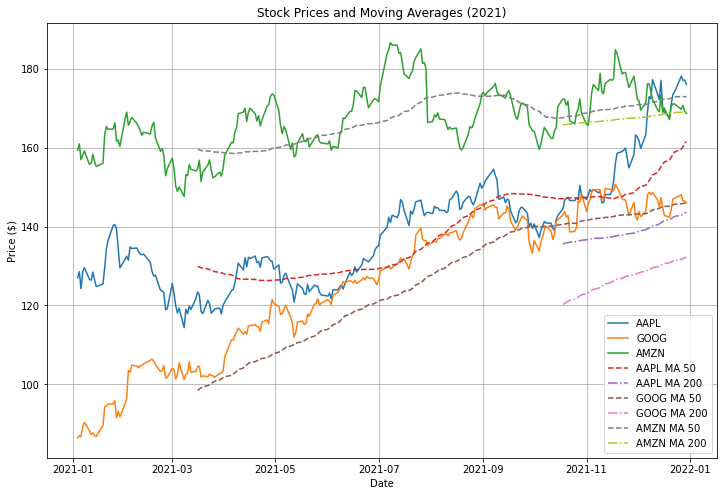

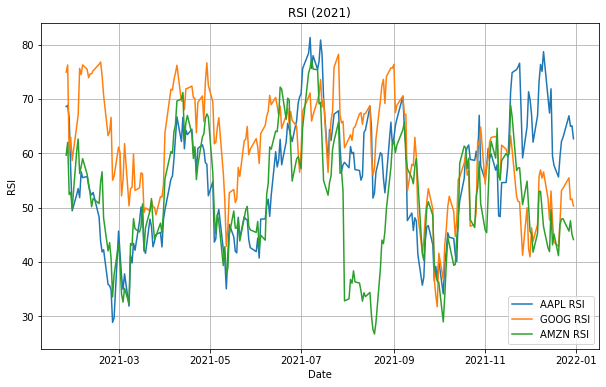

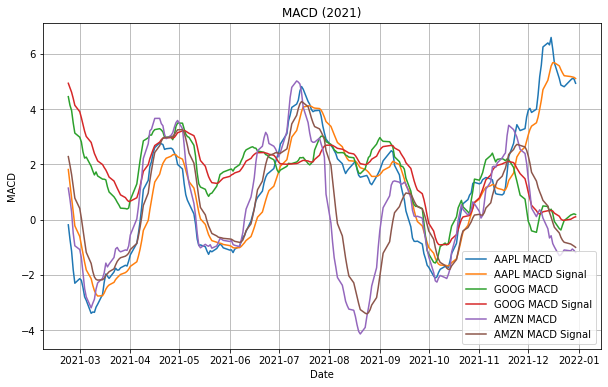


Recommendations:
------------------------------
Moving Averages Crossover:
AAPL: 0 crossover events
GOOG: 0 crossover events
AMZN: 0 crossover events

RSI Overbought/Oversold:
AAPL: 25 overbought, 2 oversold
Recommendation for AAPL: Consider selling if you hold shares.
GOOG: 45 overbought, 0 oversold
Recommendation for GOOG: Consider selling if you hold shares.
AMZN: 9 overbought, 4 oversold
Recommendation for AMZN: Consider selling if you hold shares.

MACD Signal Crossover:
AAPL: 5 crossover events
Recommendation for AAPL: Consider buying.
GOOG: 11 crossover events
Recommendation for GOOG: Consider buying.
AMZN: 7 crossover events
Recommendation for AMZN: Consider buying.


In [17]:
# Loading stock price data
symbols = ['AAPL', 'GOOG', 'AMZN']  # Example stock symbols (Apple, Google, Amazon)
start_date = '2021-01-01'
end_date = '2021-12-31'

# Download data for each symbol and concatenate into a single DataFrame
dfs = []
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol  # Add a column to identify the stock symbol
    dfs.append(data)

all_data = pd.concat(dfs)

# Calculate moving averages
all_data['MA_50'] = all_data.groupby('Symbol')['Close'].transform(lambda x: talib.SMA(x, timeperiod=50))
all_data['MA_200'] = all_data.groupby('Symbol')['Close'].transform(lambda x: talib.SMA(x, timeperiod=200))

# Calculate RSI
all_data['RSI'] = all_data.groupby('Symbol')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))

# Calculate MACD for each symbol
macd_data = []
for symbol in symbols:
    symbol_data = all_data[all_data['Symbol'] == symbol]
    macd, macd_signal, _ = talib.MACD(symbol_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    symbol_data['MACD'] = macd
    symbol_data['MACD_signal'] = macd_signal
    macd_data.append(symbol_data)

all_data = pd.concat(macd_data)

# Display the DataFrame with calculated indicators
print(all_data.head())

# Plotting
plt.figure(figsize=(12, 8))

# Plot stock prices
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['Adj Close'], label=symbol)

# Plot moving averages
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['MA_50'], label=f'{symbol} MA 50', linestyle='--')
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['MA_200'], label=f'{symbol} MA 200', linestyle='-.')

plt.title('Stock Prices and Moving Averages (2021)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['RSI'], label=f'{symbol} RSI')

plt.title('RSI (2021)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['MACD'], label=f'{symbol} MACD')
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['MACD_signal'], label=f'{symbol} MACD Signal')

plt.title('MACD (2021)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# Additional Analysis
print("\nRecommendations:")
print("-" * 30)

# Moving Averages Crossover
print("Moving Averages Crossover:")
for symbol in symbols:
    ma_50 = all_data.loc[all_data['Symbol'] == symbol, 'MA_50']
    ma_200 = all_data.loc[all_data['Symbol'] == symbol, 'MA_200']
    crossover = (ma_50 > ma_200) & (ma_50.shift(1) < ma_200.shift(1))
    num_crossover = crossover.sum()
    print(f"{symbol}: {num_crossover} crossover events")
    if num_crossover > 0:
        print(f"Recommendation for {symbol}: Consider buying.")

# RSI Overbought/Oversold
print("\nRSI Overbought/Oversold:")
for symbol in symbols:
    rsi = all_data.loc[all_data['Symbol'] == symbol, 'RSI']
    overbought = (rsi > 70).sum()
    oversold = (rsi < 30).sum()
    print(f"{symbol}: {overbought} overbought, {oversold} oversold")
    if overbought > 0:
        print(f"Recommendation for {symbol}: Consider selling if you hold shares.")
    elif oversold > 0:
        print(f"Recommendation for {symbol}: Consider buying.")

# MACD Signal Crossover
print("\nMACD Signal Crossover:")
for symbol in symbols:
    macd = all_data.loc[all_data['Symbol'] == symbol, 'MACD']
    macd_signal = all_data.loc[all_data['Symbol'] == symbol, 'MACD_signal']
    crossover = (macd > macd_signal) & (macd.shift(1) < macd_signal.shift(1))
    num_crossover = crossover.sum()
    print(f"{symbol}: {num_crossover} crossover events")
    if num_crossover > 0:
        print(f"Recommendation for {symbol}: Consider buying.")


In [24]:
# Calculate daily returns
daily_returns = all_data.groupby('Symbol')['Adj Close'].pct_change()

# Calculate annualized returns
annualized_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Calculate annualized volatility
annualized_volatility = daily_returns.std() * np.sqrt(252)

# Calculate Sharpe ratio (assuming risk-free rate is 0)
sharpe_ratio = annualized_returns / annualized_volatility

# Display calculated metrics
print("Annualized Returns:")
print(annualized_returns)
print("\nAnnualized Volatility:")
print(annualized_volatility)
print("\nSharpe Ratio:")
print(sharpe_ratio)


Annualized Returns:
0.33449056995721643

Annualized Volatility:
0.2428754083395117

Sharpe Ratio:
1.3772105304693398


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


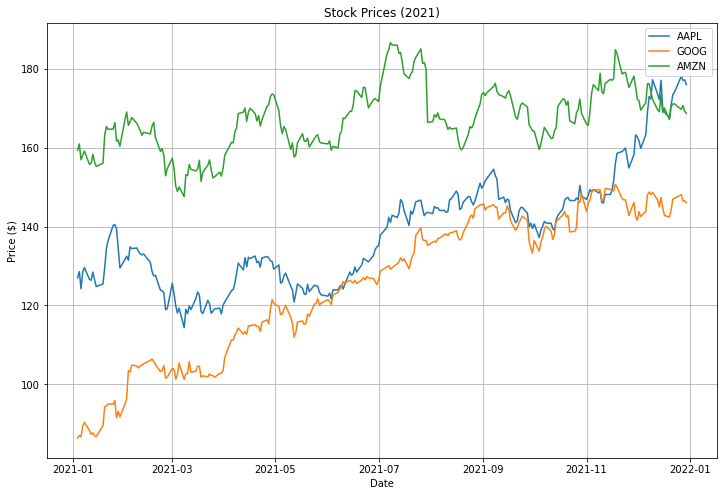

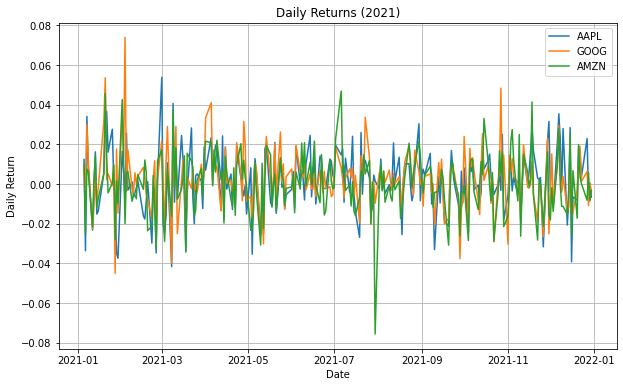


Calculated Metrics:
------------------------------
Annualized Returns:
Symbol
AAPL    0.360158
AMZN    0.086196
GOOG    0.557118
Name: Daily_Return, dtype: float64

Annualized Volatility:
Symbol
AAPL    0.250607
AMZN    0.240605
GOOG    0.237274
Name: Daily_Return, dtype: float64

Sharpe Ratio:
Symbol
AAPL    1.437144
AMZN    0.358247
GOOG    2.347993
Name: Daily_Return, dtype: float64

Analysis:
--------------------------------------------------

Annualized Returns:
AAPL: 36.02%
GOOG: 55.71%
AMZN: 8.62%

Annualized Volatility:
AAPL: 25.06%
GOOG: 23.73%
AMZN: 24.06%

Sharpe Ratio:
AAPL: 1.44
GOOG: 2.35
AMZN: 0.36

Conclusion:
1. Google (GOOG) has the highest annualized returns of 55.71%, followed by Apple (AAPL) with 36.02% and Amazon (AMZN) with 8.62%.
2. Google (GOOG) also exhibits the highest Sharpe ratio of 2.35, indicating a higher risk-adjusted return compared to Apple (AAPL) and Amazon (AMZN).
3. All three stocks have relatively similar levels of annualized volatility, with App

In [32]:
# Loading stock price data
symbols = ['AAPL', 'GOOG', 'AMZN']  # Example stock symbols (Apple, Google, Amazon)
start_date = '2021-01-01'
end_date = '2021-12-31'

# Download data for each symbol and concatenate into a single DataFrame
dfs = []
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol  # Add a column to identify the stock symbol
    dfs.append(data)

all_data = pd.concat(dfs)

# Calculate daily returns
all_data['Daily_Return'] = all_data.groupby('Symbol')['Adj Close'].pct_change()

# Calculate annualized returns
annualized_returns = all_data.groupby('Symbol')['Daily_Return'].mean() * 252  # Assuming 252 trading days in a year

# Calculate annualized volatility
annualized_volatility = all_data.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)

# Calculate Sharpe ratio (assuming risk-free rate is 0)
sharpe_ratio = annualized_returns / annualized_volatility

# Plot stock prices
plt.figure(figsize=(12, 8))
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['Adj Close'], label=symbol)

plt.title('Stock Prices (2021)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot daily returns
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(all_data.loc[all_data['Symbol'] == symbol].index, all_data.loc[all_data['Symbol'] == symbol]['Daily_Return'], label=symbol)

plt.title('Daily Returns (2021)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Display calculated metrics
print("\nCalculated Metrics:")
print("-" * 30)
print("Annualized Returns:")
print(annualized_returns)
print("\nAnnualized Volatility:")
print(annualized_volatility)
print("\nSharpe Ratio:")
print(sharpe_ratio)

# Analysis, Insights, and Recommendations
print("\nAnalysis:")
print("-" * 50)

# Compare annualized returns
print("\nAnnualized Returns:")
for symbol in symbols:
    print(f"{symbol}: {annualized_returns[symbol]:.2%}")

# Compare annualized volatility
print("\nAnnualized Volatility:")
for symbol in symbols:
    print(f"{symbol}: {annualized_volatility[symbol]:.2%}")

# Compare Sharpe ratio
print("\nSharpe Ratio:")
for symbol in symbols:
    print(f"{symbol}: {sharpe_ratio[symbol]:.2f}")

    # Conclusion

print("\nConclusion:")
print("1. Google (GOOG) has the highest annualized returns of 55.71%, followed by Apple (AAPL) with 36.02% and Amazon (AMZN) with 8.62%.")
print("2. Google (GOOG) also exhibits the highest Sharpe ratio of 2.35, indicating a higher risk-adjusted return compared to Apple (AAPL) and Amazon (AMZN).")
print("3. All three stocks have relatively similar levels of annualized volatility, with Apple (AAPL) slightly higher at 25.06%, followed by Amazon (AMZN) at 24.06%, and Google (GOOG) at 23.73%.")



# Recommendations
print("\nRecommendations:")
print("1. Considering the higher annualized returns and Sharpe ratio, investors may consider allocating more funds to Google (GOOG) in their portfolio.")
print("2. While Apple (AAPL) has a respectable Sharpe ratio and consistent performance, investors should assess their risk tolerance and diversification needs when investing in this stock.")
print("3. Amazon (AMZN), although exhibiting lower returns and Sharpe ratio compared to the other two stocks, can still be considered for its long-term growth potential and market dominance, especially in e-commerce and cloud computing.")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


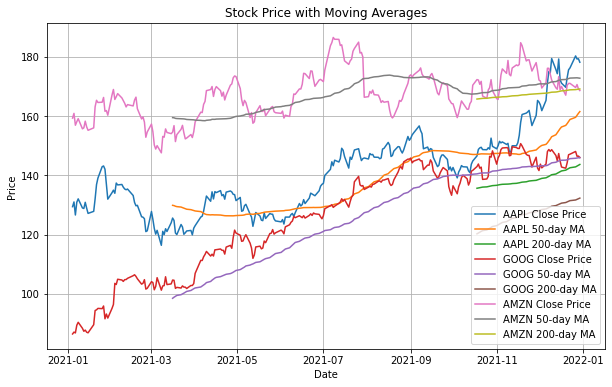

In [35]:
symbols = ['AAPL', 'GOOG', 'AMZN']
start_date = '2021-01-01'
end_date = '2021-12-31'

# Function to calculate moving averages
def calculate_moving_averages(data):
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['MA_200'] = data['Close'].rolling(window=200).mean()
    return data

# Dictionary to store data for each symbol
symbol_data = {}

# Fetch data for each symbol
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data = calculate_moving_averages(data)
    symbol_data[symbol] = data

# Plotting closing price with moving averages for each symbol
plt.figure(figsize=(10, 6))
for symbol, data in symbol_data.items():
    plt.plot(data['Close'], label=f'{symbol} Close Price')
    plt.plot(data['MA_50'], label=f'{symbol} 50-day MA')
    plt.plot(data['MA_200'], label=f'{symbol} 200-day MA')

plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
